In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
%config Completer.use_jedi = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Tasks 

- [x] Explain Simple and Optimized Implementations of the Algorithm Step by Step

## Create Dummy Data

In [2]:
from drawdata import draw_scatter
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import math
plotly.io.renderers.default = 'iframe_connected'

In [3]:
np.random.seed(42)

In [4]:
# draw_scatter()

In [5]:
# df = pd.read_clipboard(sep=',')
df = pd.read_csv('dummy_data.csv')

In [6]:
# df.to_csv('dummy_data.csv', index=None)

In [7]:
df.z.value_counts()

b    644
a    635
d    613
c    550
Name: z, dtype: int64

In [8]:
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
train_dummy = df.sample(frac=.9)

In [10]:
test_dummy = df[~df.index.isin(train_dummy.index.tolist())]

In [11]:
df.shape, train_dummy.shape, test_dummy.shape

((2442, 3), (2198, 3), (244, 3))

In [12]:
train_dummy.reset_index(inplace=True, drop=True)
test_dummy.reset_index(inplace=True, drop=True)

## KNN From Scratch

### Step1: Calculate the Distance

In [13]:
from math import sqrt, pow

# calculate minkowski distance
def minkowski_distance(r1, r2, p):
    distance = 0.0 
    for i in range(len(r1)):
        distance += abs((r1[i] - r2[i])**p)
    return distance**(1/float(p))


In [14]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [15]:
df[['x', 'y']].head().values

array([[635.37532424, 427.78460026],
       [109.44707085, 203.86658622],
       [411.23549566,   2.82374635],
       [424.12776856, 250.00197592],
       [434.08204763,  42.97226279]])

In [16]:
row0 = df[['x', 'y']].head().values[0]

In [17]:
%%time
for r in df[['x', 'y']].head().values:
    distance = minkowski_distance(row0, r, 1)
    print(distance)

0.0
749.8462674253082
649.1006824858641
389.03018002663794
586.1056140846025
Wall time: 997 µs


In [18]:
%%time
for r in df[['x', 'y']].head().values:
    distance = np.linalg.norm(row0- r, ord=1)
    print(distance)

0.0
749.8462674253082
649.1006824858641
389.03018002663794
586.1056140846025
Wall time: 998 µs


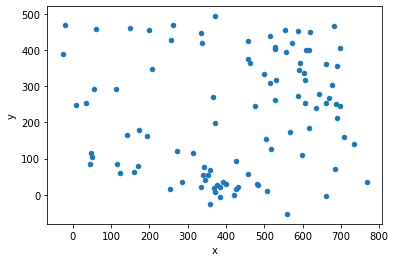

In [19]:
df.sample(100).plot.scatter('x', 'y');

In [20]:
fig = px.scatter(df, x='x', y='y', color='z')
fig

### Step2: Get Nearest Neighbours

In [21]:
# loacte similar neighbors
def get_neighbors(train, test_row, k, p):
    distances = []
    for train_row in train.values:
        dist = minkowski_distance(test_row[:-1], train_row[:-1], p)
        distances.append((train_row, dist))
    
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

In [22]:
test_dummy.sample(1)

,x,y,z
187,148.407233,201.718932,c


In [23]:
neighbors = get_neighbors(train_dummy, test_dummy.iloc[160].values, 5, 2)
neighbors

[array([385.2133816200196, 50.72923372522087, 'd'], dtype=object),
 array([381.6164658612987, 45.18528757843086, 'd'], dtype=object),
 array([387.5671433108168, 48.48194688235816, 'd'], dtype=object),
 array([388.0715888983176, 52.31334625473727, 'd'], dtype=object),
 array([377.8004505103036, 47.529381114710645, 'd'], dtype=object)]

### Step3: Make Predictions

In [24]:
def predict_classification(train, test_row, k, p):
    neighbors = get_neighbors(train, test_row, k, p)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [25]:
prediction = predict_classification(train_dummy, test_dummy.iloc[160].values, 5, 2)
prediction

'd'

### Test Accuracy

In [26]:
%%time
predicted_labels = []
labels = []
for test_row in test_dummy.values:
    predicted_labels.append(predict_classification(train_dummy, test_row, 5, 2))
    labels.append(test_row[-1])
    

Wall time: 854 ms


In [27]:
len(predicted_labels), len(labels)

(244, 244)

In [28]:
sum([True if x==y else False for x,y in zip(labels, predicted_labels)])/len(test_dummy)

0.9713114754098361

In [29]:
train_dummy

,x,y,z
0,548.893697,450.063398,a
1,309.288837,466.872668,b
2,171.742823,165.825046,c
3,33.528848,250.071816,c
4,71.128670,452.495737,c
...,...,...,...
2193,21.404658,336.734646,c
2194,750.286876,225.061827,a
2195,673.429533,205.252561,a
2196,477.136028,24.548314,d


In [ ]:
test_labels = test_dummy.z.tolist()
# test_labels

In [31]:
test_dummy.drop(columns='z', inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
test_dummy

,x,y
0,508.256193,9.972351
1,263.178640,36.146965
2,-4.152166,175.740393
3,56.204038,255.740172
4,41.424772,360.160187
...,...,...
239,427.153861,17.740464
240,666.516298,343.719778
241,185.022133,481.429239
242,447.106788,428.200658


## Combine The Codes to a KNNClassifier Class

In [33]:
class KNNClassifier():
    
    def __init__(self, metric_fn='eucledean_distance', norm=2):
        self.metric_fn = metric_fn
        self.norm = norm
            
    
    def minkowski_distance(self, row1, row2, norm):
        distance = 0.0 
        for i in range(len(row1)):
            distance += abs((row1[i] - row2[i])**norm)
        return distance**(1/float(norm))
    
    def get_distance_metric(self, metric_fn):
        self.distance_metrics = {'minkowski_distance': (self.minkowski_distance, self.norm),
                                 'euclidean_distance': (self.minkowski_distance, 2),
                                 'manhattan_distance': (self.minkowski_distance, 1),
                                }
        if self.metric_fn != 'custom_metric':                        
            return self.distance_metrics[metric_fn]
        else:
            return (metric_fn, None)
    
    
    def get_neighbors(self, k, train, test_row, distance_metric, norm):
        
        distances = []
        for train_row in train.values:
            dist = distance_metric(test_row, train_row[:-1], norm)
            distances.append((train_row, dist))
            
        distances.sort(key=lambda tup: tup[1])
        
        neighbors = []
        for i in range(k):
            neighbors.append(distances[i][0])
        
        return neighbors
    
    def predict_instance(self, k, train, test_row):
        distance_metric, norm = self.get_distance_metric(self.metric_fn)
        self.neighbors = self.get_neighbors(k, train, test_row, distance_metric, norm)
        output_values = [row[-1] for row in self.neighbors]
        self.prediction = max(set(output_values), key=output_values.count)
        return self.prediction
    
    def predict_batch(self, k, train, test):
        self.predicted_labels = []
        for test_row in test.values:
            self.predicted_labels.append(self.predict_instance(k, train, test_row))
        return self.predicted_labels
    
    def learning_metrics(self, test_labels):
        self.misclassified_instances = [True if x==y else False for x,y in zip(test_labels, self.predicted_labels)]
        self.accuracy = sum(self.misclassified_instances)/len(test_labels)
        self.error_rate = 1 - self.accuracy
        self.misclassified_instances_indices =  [i for i, x in enumerate(self.misclassified_instances) if not x]
        return {'accuracy': self.accuracy, 'error_rate':self.error_rate}

In [34]:
knnclassifier = KNNClassifier(metric_fn='euclidean_distance')

In [35]:
test_dummy.iloc[100].values

array([577.09984428, 317.56038476])

In [36]:
knnclassifier.predict_instance(5, train_dummy, test_dummy.iloc[100].values)

'a'

In [37]:
predicted_labels = knnclassifier.predict_batch(5, train_dummy, test_dummy)

In [38]:
knnclassifier.learning_metrics(test_labels)

{'accuracy': 0.9713114754098361, 'error_rate': 0.02868852459016391}

In [39]:
knnclassifier.misclassified_instances_indices

[33, 38, 40, 43, 139, 193, 230]

In [40]:
knnclassifier = KNNClassifier(metric_fn='minkowski_distance', norm=10)

In [41]:
test_dummy.iloc[100].values, test_labels[100]

(array([577.09984428, 317.56038476]), 'a')

In [42]:
knnclassifier.predict_instance(10, train_dummy, test_dummy.iloc[100].values)

'a'

In [43]:
predicted_labels = knnclassifier.predict_batch(10, train_dummy, test_dummy)

In [44]:
knnclassifier.learning_metrics(test_labels)

{'accuracy': 0.9836065573770492, 'error_rate': 0.016393442622950838}

In [45]:
knnclassifier.error_rate

0.016393442622950838

In [46]:
knnclassifier.accuracy

0.9836065573770492

In [47]:
knnclassifier.misclassified_instances_indices

[40, 43, 139, 193]

## Apply to Real Word Dataset

In [48]:
from sklearn import datasets

In [49]:
iris = datasets.load_iris()

In [50]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [51]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
train = df.sample(frac=0.7)

In [55]:
test = df[~df.index.isin(train.index)]

In [56]:
test.shape, train.shape, df.shape

((45, 5), (105, 5), (150, 5))

In [57]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [58]:
test_targets = test.target.tolist()

In [59]:
test.drop(columns='target', inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
scaler = StandardScaler()

In [61]:
train_standardized = pd.DataFrame(scaler.fit_transform(train.iloc[:,:-1]))

In [62]:
train_standardized['target'] = train.target

In [63]:
test_standardized = pd.DataFrame(scaler.transform(test))

In [64]:
train_standardized.head()

,0,1,2,3,target
0,0.647808,0.398829,0.394246,0.390260,1
1,1.018825,0.156765,0.509554,0.390260,1
2,-1.330951,0.882957,-1.277730,-1.356313,0
3,0.771480,-0.085299,0.797826,1.062019,2
4,1.018825,0.640893,1.086098,1.196370,2


In [65]:
test_standardized.head()

,0,1,2,3
0,1.884532,-0.569427,1.316715,0.927667
1,0.276791,-0.085299,0.624863,0.793315
2,-0.341571,-0.085299,0.163628,0.121556
3,-0.959934,1.125021,-1.393038,-1.221961
4,-0.217899,-1.295619,0.682517,1.062019


In [66]:
knnclassifier = KNNClassifier(metric_fn='minkowski_distance', norm=2)

In [67]:
test_standardized.iloc[10], test_targets[10]

(0   -0.959934
 1    1.609149
 2   -1.335384
 3   -1.087609
 Name: 10, dtype: float64,
 0)

In [68]:
knnclassifier.predict_instance(10, train_standardized, test_standardized.iloc[10].values)

0.0

In [69]:
predicted_classes = knnclassifier.predict_batch(10, train_standardized, test_standardized)

In [70]:
knnclassifier.learning_metrics(test_labels=test_targets)

{'accuracy': 1.0, 'error_rate': 0.0}

In [71]:
knnclassifier.misclassified_instances_indices

[]

In [72]:
test['target'] = test_targets

<ipython-input-72-fc4806014102>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
test.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [74]:
fig = px.scatter_3d(test, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='target')
fig

In [75]:
test['predicted_targets'] = predicted_classes

<ipython-input-75-19e34d8cdd89>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
fig = px.scatter_3d(test, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='predicted_targets')
fig

## Compare results to Sklearn KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
clf = KNeighborsClassifier(n_neighbors=10, p=2)

In [79]:
clf.fit(train_standardized.iloc[:,:-1], train_standardized.iloc[:,-1])

KNeighborsClassifier(n_neighbors=10)

In [80]:
y_pred_test = clf.predict(test_standardized)

In [81]:
y_pred_test

array([2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2,
       0])

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
print(accuracy_score(test_targets, y_pred_test))

1.0


## Effect of Neigbors on Prediction Accuracy on Iris Data

In [84]:
accuracies = []
clf = KNNClassifier(metric_fn='euclidean_distance')

for k in range(1,100):
    _ = clf.predict_batch(k=k, train=train_standardized, test=test_standardized)
    accuracies.append((k, clf.learning_metrics(test_targets)['accuracy']))
        

In [85]:
acc = pd.DataFrame(accuracies, columns=['k', 'accuracy'])
acc.head()

,k,accuracy
0,1,0.933333
1,2,0.977778
2,3,0.977778
3,4,1.000000
4,5,1.000000


In [86]:
fig = px.line(data_frame=acc, x='k', y='accuracy')
fig

## Custom KNN Classifier Implementation Using Numpy Optimizations

In [88]:
df = pd.read_excel('../datasets/diabetes.xlsx')

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier

In [92]:
class KNNClassifier2():
    def __init__(self, k, norm=2):
        self.k = k
        self.norm = norm
        
    def fit(self, X_train, y_train):
        '''just store the training data'''
        self.X_train = X_train
        self.y_train = y_train
        # no. of examples, no. of features
        self.m, self.n = self.X_train.shape
        
    def predict(self, X_test):
        self.X_test = X_test
        self.m_test, self.n_test = self.X_test.shape
        
        y_predict = np.zeros(self.m_test)
        
        for i in range(self.m_test):
            x = self.X_test[i]
            
            neighbors = np.zeros(self.k)
            
            neighbors = self.find_neighbors(x)
            
            y_predict[i] = mode(neighbors)[0][0]
        
        return y_predict
    
    def find_neighbors(self, x):
        distances = np.zeros(self.m)
        
        for i in range(self.m):
            d = self.distance(x, self.X_train[i])
            distances[i] = d
        
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
        
        inds = distances.argsort()
        y_train_sorted = self.y_train[inds]
        
        return y_train_sorted[:self.k]
    
    def distance(self, x, x_train):
        return np.linalg.norm(x-x_train, ord=self.norm)
        
        

In [93]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [95]:
X_train_1 = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)

In [96]:
X_train_df = pd.DataFrame(X_train_1)
X_train_df.head()

,0,1,2,3,4,5,6,7,8
0,13.0,145.0,82.0,19.0,110.0,22.2,0.245,57.0,0.0
1,3.0,180.0,64.0,25.0,70.0,34.0,0.271,26.0,0.0
2,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
3,8.0,176.0,90.0,34.0,300.0,33.7,0.467,58.0,1.0
4,4.0,144.0,58.0,28.0,140.0,29.5,0.287,37.0,0.0


In [97]:
X_test_df = pd.DataFrame(X_test)
X_test_df.head()

,0,1,2,3,4,5,6,7
0,5.0,95.0,72.0,33.0,0.0,37.7,0.370,27.0
1,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0
2,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
3,0.0,101.0,65.0,28.0,0.0,24.6,0.237,22.0
4,5.0,44.0,62.0,0.0,0.0,25.0,0.587,36.0


In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [101]:
X_train_df_standardized = pd.DataFrame(scaler.fit_transform(X_train_df.iloc[:,:-1]))

In [102]:
X_train_df_standardized['targets'] = X_train_df.iloc[:,-1]

In [103]:
X_train_df_standardized.head()

,0,1,2,3,4,5,6,7,targets
0,2.479882,0.881615,0.644672,-0.149411,0.146128,-0.987948,-0.730291,2.147907,0.0
1,-0.331953,1.982541,-0.207005,0.219421,-0.147966,0.313386,-0.642131,-0.650767,0.0
2,0.230414,-0.030581,0.266149,-1.317378,-0.662631,-0.612988,-0.879486,-0.289648,0.0
3,1.073965,1.856721,1.023195,0.772669,1.543076,0.280302,0.022464,2.238187,1.0
4,-0.050769,0.850160,-0.490897,0.403837,0.366699,-0.182885,-0.587878,0.342311,0.0


In [104]:
X_test_df_standardized = pd.DataFrame(scaler.transform(X_test))

In [105]:
X_train_df_standardized.shape, X_test_df_standardized.shape, y_train.shape, y_test.shape

((72, 9), (36, 8), (72,), (36,))

In [106]:
model1 = KNNClassifier(metric_fn='euclidean_distance')
model2 = KNNClassifier2(k=5, norm=2)
model3 = KNeighborsClassifier(n_neighbors=5)

In [107]:
model2.fit(X_train, y_train)
model3.fit(X_train_df_standardized.iloc[:, :-1], y_train)

KNeighborsClassifier()

In [108]:
y_pred1 = model1.predict_batch(5, X_train_df_standardized, X_test_df_standardized)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test_df_standardized)

In [109]:
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)

In [110]:
acc1, acc2, acc3

(0.6388888888888888, 0.6388888888888888, 0.6388888888888888)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        23
           1       0.50      0.31      0.38        13

    accuracy                           0.64        36
   macro avg       0.59      0.57      0.56        36
weighted avg       0.61      0.64      0.61        36



## Custom KNN Regressor Implementation Using Numpy Optimizations

In [113]:
data = datasets.load_diabetes()

In [114]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [115]:
df['target'] = data.target

In [116]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [117]:
class KNNRegressor():
    def __init__(self, k, norm=2):
        self.k = k
        self.norm = norm
        
    def fit(self, X_train, y_train):
        '''just store the training data'''
        self.X_train = X_train
        self.y_train = y_train
        # no. of examples, no. of features
        self.m, self.n = self.X_train.shape
    
    def find_neighbors(self, x):
        distances = np.zeros(self.m)
        
        for i in range(self.m):
            d = self.distance(x, self.X_train[i])
            distances[i] = d
        
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
        
        inds = distances.argsort()
        y_train_sorted = self.y_train[inds]
        
        return y_train_sorted[:self.k]
    
    def distance(self, x, x_train):
        return np.linalg.norm(x-x_train, ord=self.norm)
    
    def predict(self, x_test):
        self.x_test = x_test
        self.m_test, self.n_test = self.x_test.shape
        
        y_predict = np.zeros(self.m_test)
        
        for i in range(self.m_test):
            x = self.x_test[i]
            
            neighbors = np.zeros(k)
            neighbors = self.find_neighbors(x)
            
            y_predict[i] = np.mean(neighbors)
            
        return y_predict
            

In [118]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [121]:
model1 = KNNRegressor(k=5, norm=2)
model2 = KNeighborsRegressor(n_neighbors=5, p=2)

In [122]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

KNeighborsRegressor()

In [123]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
err1 = mean_squared_error(y_test, y_pred1)
err2 = mean_squared_error(y_test, y_pred2)

In [126]:
err1, err2

(3180.2686486486487, 3180.2686486486487)

In [127]:
list(zip(y_test[:5], y_pred1[:5]))

[(219.0, 125.6), (70.0, 160.2), (202.0, 153.0), (230.0, 236.6), (111.0, 153.4)]

## KNN Classifier for Digit Recognition

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np

In [129]:
mnist = datasets.load_digits()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

In [131]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [132]:
print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
print("testing data points: {}".format(len(y_test)))

training data points: 1212
validation data points: 135
testing data points: 450


## Training

In [133]:
k_values = range(1, 30, 2)

accuracies = []

for k in range(1, 30, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    accuracies.append(score)

In [134]:
acc_df = pd.DataFrame(zip(k_values, accuracies), columns=['k_values', 'accuracies'])
fig = px.line(data_frame=acc_df, x='k_values', y='accuracies')
fig

In [135]:
k = 5 
model = KNeighborsClassifier(n_neighbors=k_values[k])
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [136]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        46
           4       0.98      1.00      0.99        55
           5       0.98      0.93      0.96        59
           6       0.98      1.00      0.99        45
           7       1.00      1.00      1.00        41
           8       0.97      0.95      0.96        38
           9       0.94      0.96      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [137]:
confusion_matrix(y_test, predictions)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 46]], dtype=int64)

Predicted digit :  2


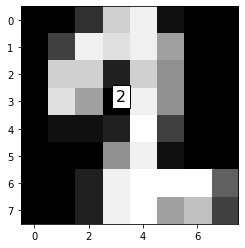

Predicted digit :  0


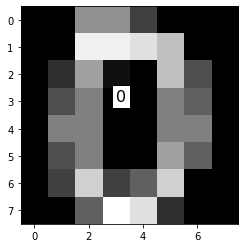

Predicted digit :  6


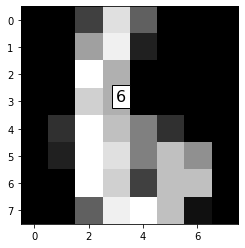

Predicted digit :  3


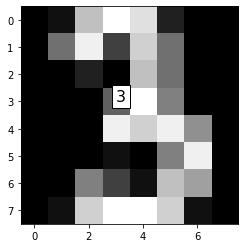

Predicted digit :  7


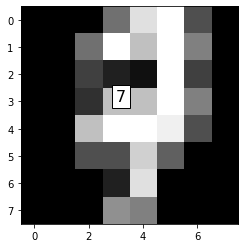

In [138]:
# displaying results for a few digits
for i in np.random.randint(0, high=len(y_test), size=(5,)):
  # grab the image and classify it
  image = X_test[i]
  prediction = model.predict([image])[0]
  
  # show the prediction
  imgdata = np.array(image, dtype='float')
  pixels = imgdata.reshape((8,8))
  plt.imshow(pixels,cmap='gray')
  plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
  print("Predicted digit : ",prediction)
  plt.show()

In [139]:
k_values = range(1, 30, 2)

accuracies = []

for k in range(1, 30, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracies.append(score)

acc_df = pd.DataFrame(zip(k_values, accuracies), columns=['k_values', 'accuracies'])
fig = px.line(data_frame=acc_df, x='k_values', y='accuracies')
fig